## Tensorflow

In [1]:
# importing the libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [2]:
#checking the working of the gpu

tensorflow.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None)
tensorflow.config.list_physical_devices('GPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
dict = {
    0:'bags',
    1:'belts',
    2:'dresses',
    3:'eyewear',
    4:'footwear',
    5:'hats',
    6:'leggings',
    7:'outerwear',
    8:'pants',
    9:'skirts',
    10:'tops'
}

In [4]:
#importing the models

#Resnet_ = tf.keras.models.load_model("Resnet101.h5")
#Mobilenet_ = tensorflow.keras.models.load_model("Mobilenetnet.h5")
#Vgg19_ = tf.keras.models.load_model("VGG19.h5")

In [5]:
# Generating images for the Training set
'''datagen = ImageDataGenerator(rescale = 1./255,
                            shear_range = 0.2,
                            rotation_range=10,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            vertical_flip = True,
                            validation_split = 0.2,
                            dtype = 'float32')'''


"datagen = ImageDataGenerator(rescale = 1./255,\n                            shear_range = 0.2,\n                            rotation_range=10,\n                            width_shift_range=0.2,\n                            height_shift_range=0.2,\n                            zoom_range = 0.2,\n                            horizontal_flip = True,\n                            vertical_flip = True,\n                            validation_split = 0.2,\n                            dtype = 'float32')"

In [6]:
# Creating the Training set
'''data_set = datagen.flow_from_directory('Dataset/',
                                        target_size = (224,224),
                                        batch_size = 16)'''

"data_set = datagen.flow_from_directory('Dataset/',\n                                        target_size = (224,224),\n                                        batch_size = 16)"

In [7]:
'''def build_model(): 
    input_image = tensorflow.keras.Input(shape=(224, 224, 3))
    resized_image = tensorflow.keras.layers.Lambda(lambda image:
                                           tensorflow.keras.backend.resize_images(x=image, 
                                                                                height_factor=1, 
                                                                                width_factor=1,
                                                                                data_format='channels_last'
                                                                                 ))(input_image)
    base_model = tensorflow.keras.applications.DenseNet121(weights='imagenet', 
              include_top=False,
              input_tensor=resized_image)
    x = base_model.output
    x = tensorflow.keras.layers.Dropout(0.4)(x)
    x = tensorflow.keras.layers.GlobalAveragePooling2D()(x)
    predictions = tensorflow.keras.layers.Dense(12, activation='softmax')(x)
    model = tensorflow.keras.models.Model(inputs=base_model.input, outputs=predictions)
    return model

model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()'''

"def build_model(): \n    input_image = tensorflow.keras.Input(shape=(224, 224, 3))\n    resized_image = tensorflow.keras.layers.Lambda(lambda image:\n                                           tensorflow.keras.backend.resize_images(x=image, \n                                                                                height_factor=1, \n                                                                                width_factor=1,\n                                                                                data_format='channels_last'\n                                                                                 ))(input_image)\n    base_model = tensorflow.keras.applications.DenseNet121(weights='imagenet', \n              include_top=False,\n              input_tensor=resized_image)\n    x = base_model.output\n    x = tensorflow.keras.layers.Dropout(0.4)(x)\n    x = tensorflow.keras.layers.GlobalAveragePooling2D()(x)\n    predictions = tensorflow.keras.layers.Dense(12, activa

In [8]:
'''history = model.fit(data_set, epochs=5)'''

'history = model.fit(data_set, epochs=5)'

In [9]:
#checking the images

'''#importing the necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image

#categories of the images
category = ['bags','belts','dresses','eyewear','footwear','hats','leggings','outerwear','pants','skirts','tops']

#loop to run through all the images of all the above categories and check 
#if those images could be read by the matplotlib library or not

#loop through all the categories
for k in range(len(category)):
    print(category[k])
    #loop through all the files in the category
    for file in os.walk('./Dataset/'+category[k]+'/'):
        #a counter is initialized to keep a count of images that cannot be read
        c=0
        for i in range(len(file[2])):
            #checking if the images are .jpg or not and trying to read them using matplotlib library
            if '.jpg' in file[2][i]:
                try:
                    img = image.imread('./Dataset/'+category[k]+'/'+file[2][i])
                except:
                    os.remove('./Dataset/'+category[k]+'/'+file[2][i])
                    c+=1
                    #print(category[k],file[2][i])
        #printing the total number of files in the category and the files that cannot be read by matplotlib
        #also excludes the files which arent jpg
        print(len(file[2]),c)'''

"#importing the necessary libraries\nimport os\nimport cv2\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom matplotlib import image\n\n#categories of the images\ncategory = ['bags','belts','dresses','eyewear','footwear','hats','leggings','outerwear','pants','skirts','tops']\n\n#loop to run through all the images of all the above categories and check \n#if those images could be read by the matplotlib library or not\n\n#loop through all the categories\nfor k in range(len(category)):\n    print(category[k])\n    #loop through all the files in the category\n    for file in os.walk('./Dataset/'+category[k]+'/'):\n        #a counter is initialized to keep a count of images that cannot be read\n        c=0\n        for i in range(len(file[2])):\n            #checking if the images are .jpg or not and trying to read them using matplotlib library\n            if '.jpg' in file[2][i]:\n                try:\n                    img = image.imread('./Dataset/'+category[k]+'/'+file[2][i])

## Pytorch

In [10]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os
import fastai
from fastai.vision.all import *

%matplotlib inline

In [11]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "GPU_ID"
import torch
print(torch.cuda.is_available())

True


In [12]:
#Data augmentation

path = './Dataset/'
data = ImageDataLoaders.from_folder(path, 
                                  train=".", 
                                  valid_pct=0.2,
                                  batch_tfms=aug_transforms(
                                      do_flip=True, 
                                      flip_vert=True,
                                      max_rotate=30.0, 
                                      max_zoom=1.1,
                                      max_lighting=0.4),
                                  item_tfms=Resize(224), 
                                  bs = 64
                                   )

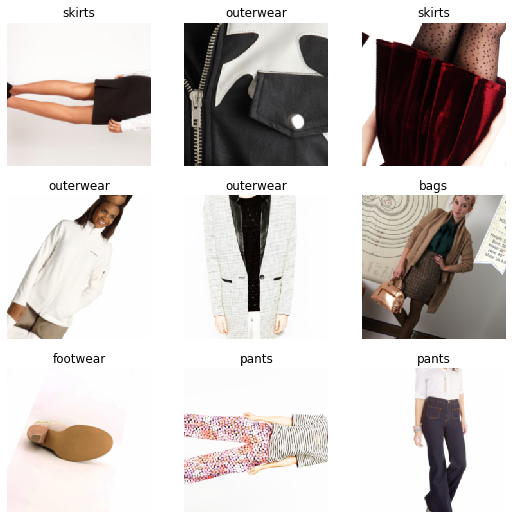

In [13]:
data.show_batch()

In [14]:
data.c

11

In [15]:
print(len(data.train_ds),len(data.valid_ds))

95749 23937


## Resnet101

In [16]:
learn = cnn_learner(data, 
                    fastai.vision.models.resnet101,
                    pretrained=True,
                    metrics=accuracy)

In [17]:
#learn.lr_find()

In [18]:
#learn.fine_tune(3, lr)

In [19]:
learn.fit_one_cycle(5,normalize=True,loss_func="categorical_crossentropy")

epoch,train_loss,valid_loss,accuracy,time
0,0.793812,0.557422,0.820738,43:11
1,0.624681,0.451254,0.846806,43:36
2,0.562782,0.405099,0.859840,43:07
3,0.489633,0.372615,0.873251,43:01
4,0.500383,0.369685,0.875005,43:04


In [20]:
interp = ClassificationInterpretation.from_learner(learn)

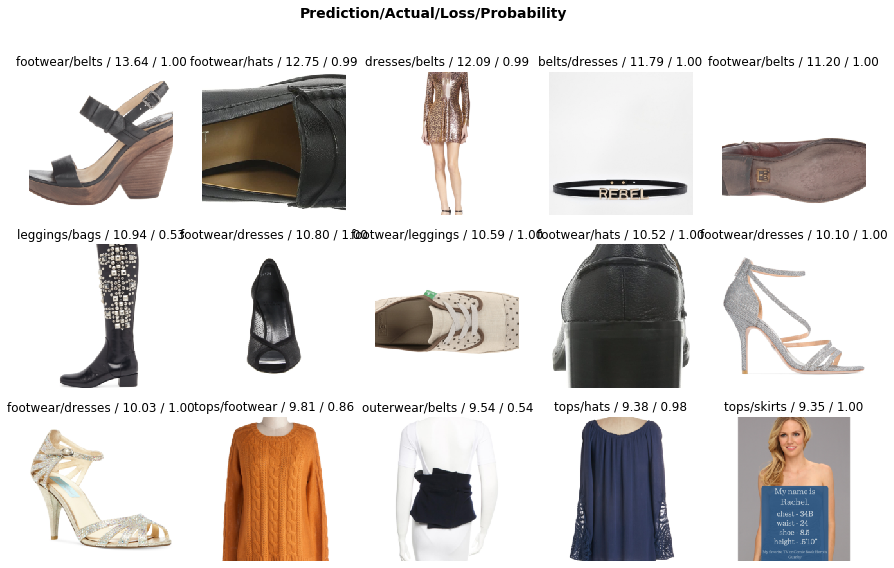

In [21]:
interp.plot_top_losses(9)

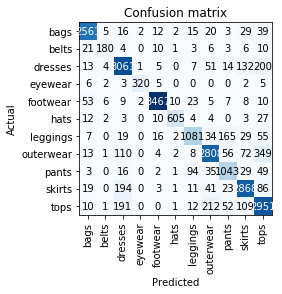

In [22]:
interp.plot_confusion_matrix()

In [23]:
interp.print_classification_report()

              precision    recall  f1-score   support

        bags       0.94      0.95      0.94      2704
       belts       0.90      0.74      0.81       244
     dresses       0.84      0.88      0.86      3488
     eyewear       0.98      0.93      0.96       343
    footwear       0.98      0.96      0.97      3600
        hats       0.97      0.90      0.93       670
    leggings       0.86      0.77      0.81      1408
   outerwear       0.87      0.82      0.85      3423
       pants       0.76      0.82      0.79      1272
      skirts       0.87      0.88      0.88      3246
        tops       0.78      0.83      0.81      3539

   micro avg       0.88      0.88      0.88     23937
   macro avg       0.89      0.86      0.87     23937
weighted avg       0.88      0.88      0.88     23937



In [24]:
learn.save("resnet121_model")

Path('Dataset/models/resnet121_model.pth')

## Squeezenet1_1

In [25]:
learn = cnn_learner(data, 
                    fastai.vision.models.squeezenet1_1,
                    pretrained=True,
                    metrics=accuracy)

Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /home/aparajita/.cache/torch/hub/checkpoints/squeezenet1_1-f364aa15.pth


In [26]:
learn.fit_one_cycle(5,normalize=True,loss_func="categorical_crossentropy")

epoch,train_loss,valid_loss,accuracy,time
0,1.246361,0.828407,0.717383,13:41
1,1.069516,0.735314,0.744371,13:06
2,1.012290,0.687547,0.762167,13:02
3,0.943520,0.659433,0.774909,13:05


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
interp = ClassificationInterpretation.from_learner(learn)

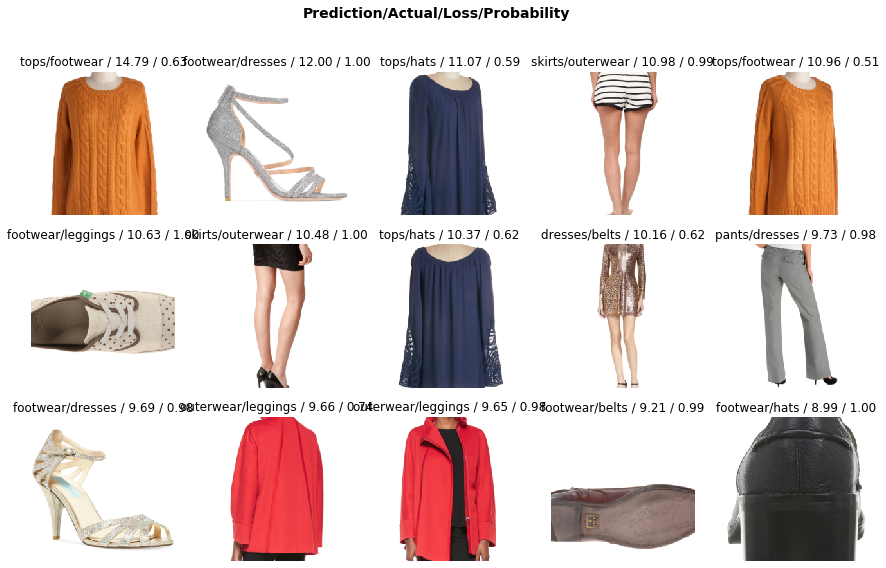

In [28]:
interp.plot_top_losses(9)

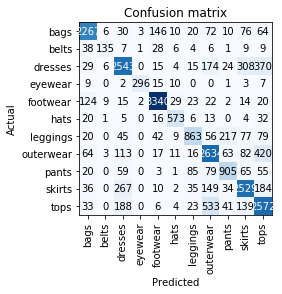

In [29]:
interp.plot_confusion_matrix()

In [30]:
interp.print_classification_report()

              precision    recall  f1-score   support

        bags       0.85      0.84      0.85      2704
       belts       0.84      0.55      0.67       244
     dresses       0.78      0.73      0.75      3488
     eyewear       0.98      0.86      0.92       343
    footwear       0.92      0.93      0.92      3600
        hats       0.87      0.86      0.86       670
    leggings       0.79      0.61      0.69      1408
   outerwear       0.70      0.77      0.74      3423
       pants       0.70      0.71      0.70      1272
      skirts       0.76      0.78      0.77      3246
        tops       0.67      0.73      0.70      3539

   micro avg       0.78      0.78      0.78     23937
   macro avg       0.81      0.76      0.78     23937
weighted avg       0.78      0.78      0.78     23937



In [31]:
learn.save("squeezenet1_1_model")

Path('Dataset/models/squeezenet1_1_model.pth')

## Densenet161

In [32]:
learn = cnn_learner(data, 
                    fastai.vision.models.densenet121,
                    pretrained=True,
                    metrics=accuracy)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /home/aparajita/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [33]:
learn.fit_one_cycle(5,normalize=True,loss_func="categorical_crossentropy")

epoch,train_loss,valid_loss,accuracy,time
0,0.804888,0.537275,0.821239,28:50
1,0.643629,0.454648,0.846180,28:47
2,0.554907,0.412347,0.861470,28:40
3,0.507156,0.388422,0.869449,28:39


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
interp = ClassificationInterpretation.from_learner(learn)

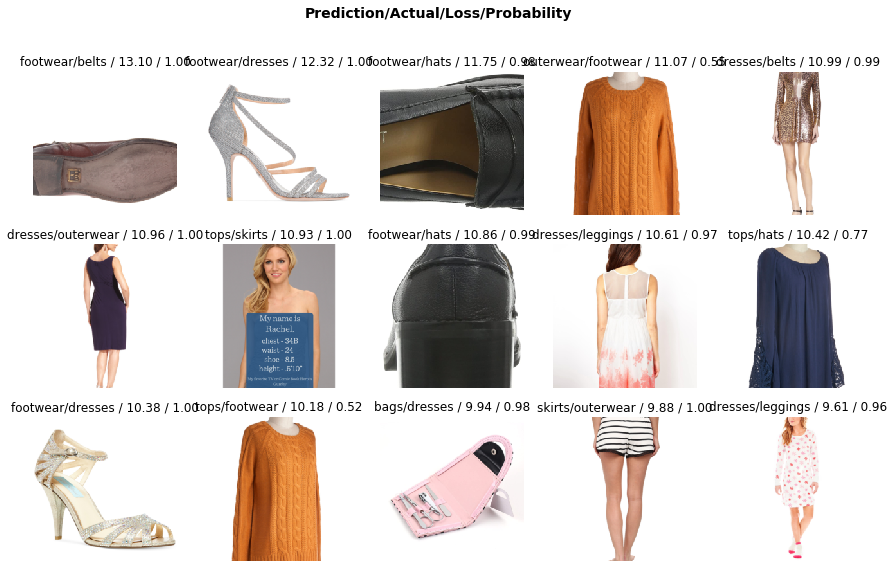

In [35]:
interp.plot_top_losses(9)

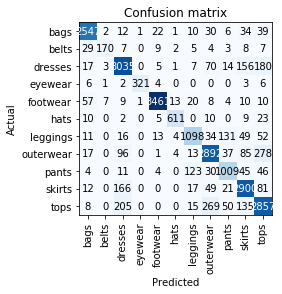

In [36]:
interp.plot_confusion_matrix()

In [37]:
interp.print_classification_report()

              precision    recall  f1-score   support

        bags       0.94      0.94      0.94      2704
       belts       0.93      0.70      0.80       244
     dresses       0.85      0.87      0.86      3488
     eyewear       0.99      0.94      0.96       343
    footwear       0.98      0.96      0.97      3600
        hats       0.96      0.91      0.94       670
    leggings       0.84      0.78      0.81      1408
   outerwear       0.85      0.84      0.85      3423
       pants       0.79      0.79      0.79      1272
      skirts       0.84      0.89      0.87      3246
        tops       0.80      0.81      0.80      3539

   micro avg       0.87      0.87      0.87     23937
   macro avg       0.89      0.86      0.87     23937
weighted avg       0.87      0.87      0.87     23937



In [38]:
learn.save("densenet161_model")

Path('Dataset/models/densenet161_model.pth')

## vgg19_bn

In [39]:
learn = cnn_learner(data, 
                    fastai.vision.models.vgg19_bn,
                    pretrained=True,
                    metrics=accuracy)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /home/aparajita/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


In [40]:
learn.fit_one_cycle(5,normalize=True,loss_func="categorical_crossentropy")

epoch,train_loss,valid_loss,accuracy,time
0,0.973394,0.637388,0.785896,43:18
1,0.814290,0.540400,0.815683,42:58
2,0.730170,0.492139,0.834733,42:59
3,0.662362,0.469808,0.841166,42:58


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
interp = ClassificationInterpretation.from_learner(learn)

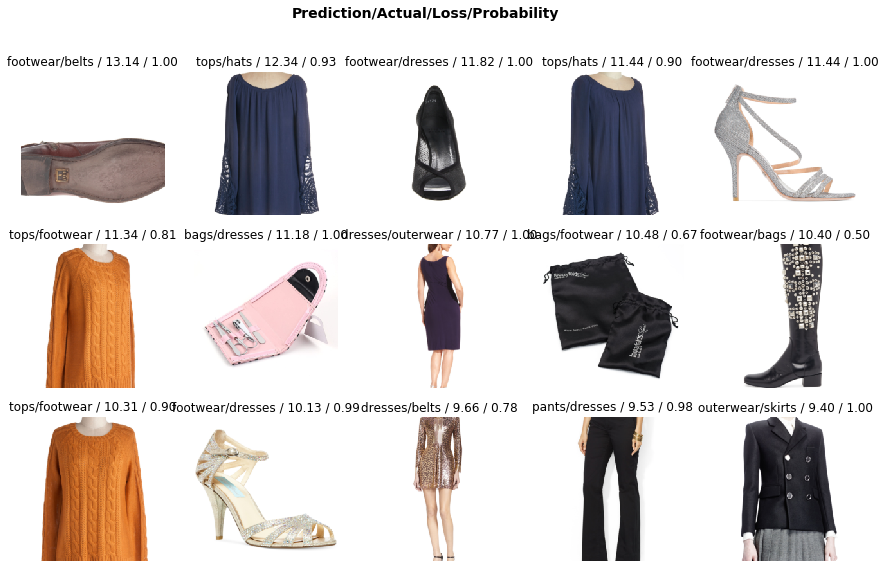

In [42]:
interp.plot_top_losses(9)

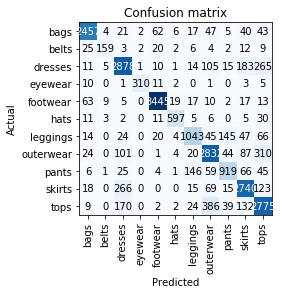

In [43]:
interp.plot_confusion_matrix()

In [44]:
interp.print_classification_report()

              precision    recall  f1-score   support

        bags       0.93      0.91      0.92      2704
       belts       0.88      0.65      0.75       244
     dresses       0.82      0.83      0.82      3488
     eyewear       0.98      0.90      0.94       343
    footwear       0.96      0.96      0.96      3600
        hats       0.94      0.89      0.91       670
    leggings       0.80      0.74      0.77      1408
   outerwear       0.79      0.83      0.81      3423
       pants       0.77      0.72      0.75      1272
      skirts       0.82      0.84      0.83      3246
        tops       0.75      0.78      0.77      3539

   micro avg       0.84      0.84      0.84     23937
   macro avg       0.86      0.82      0.84     23937
weighted avg       0.84      0.84      0.84     23937



In [45]:
learn.save("vgg19_bn_model")

Path('Dataset/models/vgg19_bn_model.pth')

## Alexnet

In [46]:
learn = cnn_learner(data, 
                    fastai.vision.models.alexnet,
                    pretrained=True,
                    metrics=accuracy)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/aparajita/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [47]:
learn.fit_one_cycle(5,normalize=True,loss_func="categorical_crossentropy")

epoch,train_loss,valid_loss,accuracy,time
0,1.412710,1.010312,0.659063,14:58
1,1.290244,0.906862,0.690145,12:56
2,1.190150,0.864230,0.705226,12:56
3,1.153280,0.829295,0.719430,13:01
4,1.154163,0.819987,0.722146,12:57


In [48]:
interp = ClassificationInterpretation.from_learner(learn)

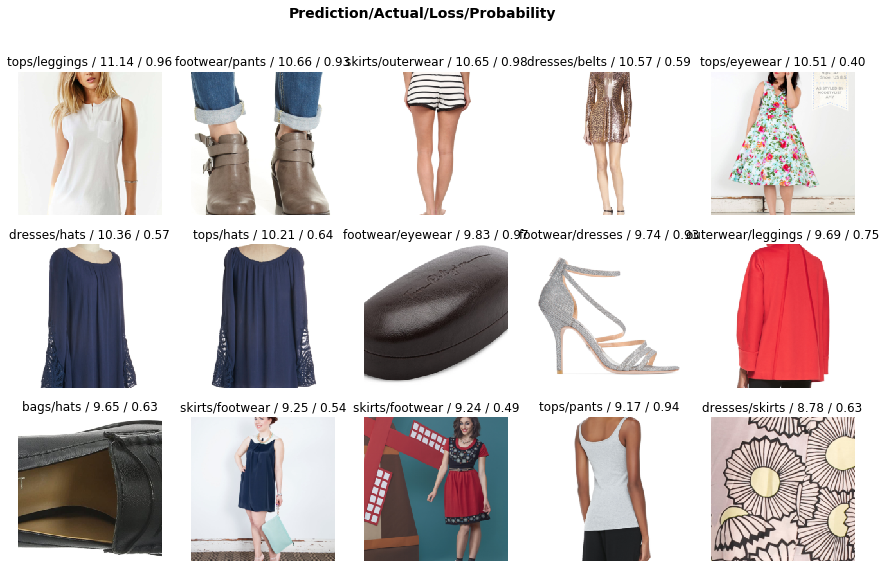

In [49]:
interp.plot_top_losses(15)

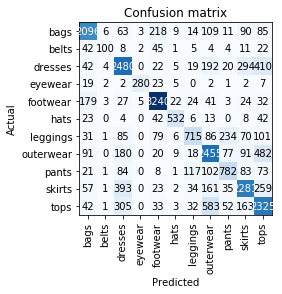

In [50]:
interp.plot_confusion_matrix()

In [51]:
interp.print_classification_report()

              precision    recall  f1-score   support

        bags       0.79      0.78      0.78      2704
       belts       0.84      0.41      0.55       244
     dresses       0.68      0.71      0.70      3488
     eyewear       0.97      0.82      0.88       343
    footwear       0.86      0.90      0.88      3600
        hats       0.89      0.79      0.84       670
    leggings       0.73      0.51      0.60      1408
   outerwear       0.66      0.72      0.68      3423
       pants       0.64      0.61      0.63      1272
      skirts       0.73      0.70      0.72      3246
        tops       0.61      0.66      0.63      3539

   micro avg       0.72      0.72      0.72     23937
   macro avg       0.76      0.69      0.72     23937
weighted avg       0.73      0.72      0.72     23937



In [52]:
learn.save("alexnet_model")

Path('Dataset/models/alexnet_model.pth')